In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit_nature.second_q.circuit.library import UCCSD, HartreeFock
from qiskit_nature.second_q.algorithms.initial_points import HFInitialPoint
from qiskit_nature.second_q.mappers import ParityMapper, JordanWignerMapper
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver

# Homemade imports
from qiskit_algorithms import VarQITE, TimeEvolutionProblem
from qiskit_algorithms.gradients import LinCombEstimatorGradient, LinCombQGT
import qiskit_algorithms.time_evolvers.variational.variational_principles.imaginary_mc_lachlan_principle as mc_lachlan
import qiskit.primitives.utils as utils

from qiskit.primitives import Estimator
from qiskit.circuit.library import EfficientSU2
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info import Statevector


In [2]:
mc_lachlan.idiot_function()
utils.idiot_function()

Idiot function
Idiot function


In [3]:
# Hamiltonian reading
data = np.loadtxt('qubit_hamil_h2.txt', dtype=str) # H2, 0.7A sto6g
paulistrings = data[:,0] 
coefficients = (data[:,1])
coefficients = [complex(coeff) for coeff in coefficients]
paulis = list(zip(paulistrings, coefficients))
qubit_op = SparsePauliOp.from_list(paulis)

#print(f"Number of qubits: {qubit_op.num_qubits}")
print(qubit_op)
#qubit_mat = qubit_op.to_matrix()
#print(qubit_mat - qubit_mat.conj().T) # Is non-Hermitian!

SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ', 'XY', 'YX', 'XX'],
              coeffs=[-1.09284335+0.j        ,  0.42027207+0.j        , -0.42027207+0.j        ,
 -0.01086588+0.j        ,  0.        +0.06359682j,  0.        -0.06359682j,
  0.1576953 +0.j        ])


In [4]:
# Equivalent problem to Hamiltonian
driver = PySCFDriver(
    atom = "H 0 0 0; H 0 0 0.7",
    unit=DistanceUnit.ANGSTROM,
    charge=0,
    spin=0,
    basis='sto6g'
)
problem = driver.run()
h = problem.hamiltonian.second_q_op()

# Estimator
seed = 170
estimator = Estimator(options={'seed': seed})
#estimator.options

# Mapper
mapper = ParityMapper(num_particles = problem.num_particles)
qubit_op2 = mapper.map(h)
print(qubit_op2)
#qubit_mat = qubit_op2.to_matrix()
#print(qubit_mat - qubit_mat.conj().T) # Is Hermitian!

SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ', 'XX'],
              coeffs=[-1.05178903+0.j,  0.4209349 +0.j, -0.4209349 +0.j, -0.01159108+0.j,
  0.17928567+0.j])


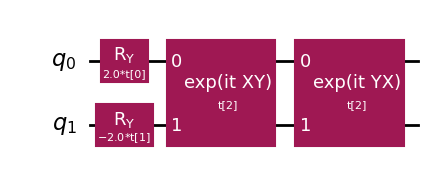

In [5]:
# Ansatz, UCCSD
ansatz = UCCSD(num_spatial_orbitals = problem.num_spatial_orbitals, num_particles = problem.num_particles, qubit_mapper=mapper)
ansatz.decompose().decompose().draw("mpl")

In [6]:
# Initial state
hf_state = HartreeFock(num_spatial_orbitals = problem.num_spatial_orbitals, num_particles = problem.num_particles, qubit_mapper=mapper)
print(hf_state)
init_param_values = [0,3*np.pi/2,-np.pi/2] # surely there should be some systematic way of doing this...

# Testing the initial state
state = Statevector.from_int(0, 2**qubit_op.num_qubits)
test_circ = ansatz.assign_parameters(init_param_values)
state = state.evolve(test_circ)
state.draw('latex')

     ┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          


<IPython.core.display.Latex object>

In [7]:
###############
### VarQITE ###
###############
# This is the TC Hamiltonian.

# The 2 main tunable parameters
total_time=5
num_timesteps = 50

var_principle = mc_lachlan.ImaginaryMcLachlanPrinciple(qgt=LinCombQGT(estimator), gradient=LinCombEstimatorGradient(estimator), is_non_hermitian=True)
time_evo = TimeEvolutionProblem(qubit_op, 
                                time=total_time, 
                                aux_operators=[qubit_op])
qite = VarQITE(ansatz, init_param_values, 
               variational_principle = var_principle,
               estimator=estimator, 
               num_timesteps=num_timesteps)
result = qite.evolve(time_evo)

QGT:
anti_hermitian in make_grad_circ: False
H plus:
anti_hermitian in make_grad_circ: False
H minus:
anti_hermitian in make_grad_circ: True
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
QGT:
H plus:
H minus:
Q

In [8]:
###############
### VarQITE ###
###############
# This is the non-TC Hamiltonian.

# The 2 main tunable parameters
total_time=5
num_timesteps = 50

var_principle = mc_lachlan.ImaginaryMcLachlanPrinciple(qgt=LinCombQGT(estimator), gradient=LinCombEstimatorGradient(estimator))
time_evo = TimeEvolutionProblem(qubit_op2, 
                                time=total_time, 
                                aux_operators=[qubit_op2])
qite = VarQITE(ansatz, init_param_values, 
               variational_principle = var_principle,
               estimator=estimator, 
               num_timesteps=num_timesteps)
result2 = qite.evolve(time_evo)

QGT:
anti_hermitian in make_grad_circ: False
H:
anti_hermitian in make_grad_circ: False
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:
QGT:
H:


In [9]:
data = np.loadtxt("energy_trace_h2.dat")
avqite_times = data[:,0]
avqite_energies = data[:,2]
initial_time=data[0,0]
initial_energy=data[0,2]
print(f"Initial time: {initial_time}, Initial energy: {initial_energy}")

Initial time: 0.0, Initial energy: -1.9225216042673814


Final Qiskit electronic energy: -1.9371863629463095 Ha


(0.0, 5.099999999999998)

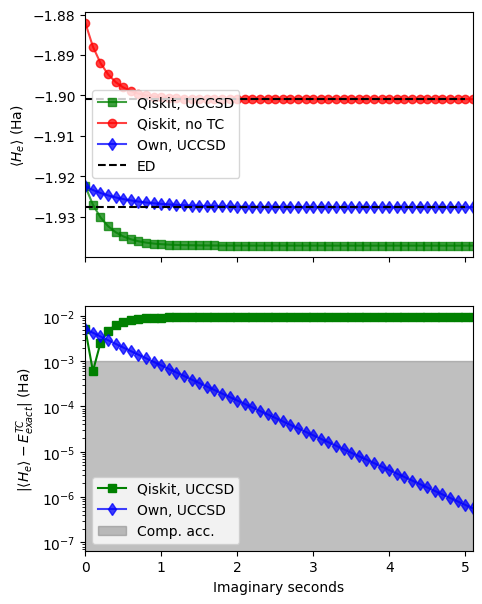

In [12]:
fig, axs = plt.subplots(2,1,sharex=True)
fig.set_figheight(7)
fig.set_figwidth(5)
ax = axs[0]
ax2 = axs[1]
#DELTA_BIG = 50
DELTA_BIG = 2
sys = "h2"
e_exact = {"h2": -1.9276748321, "h4": -4.3860854160}
e_exact_notc = {"h2": -1.9009465237, "h4": None} 

# Readin from file
#with open('h_exp_val.txt', 'r') as f:
#    h_exp_val = [float(num) for line in f for num in line.strip('[] \n').split()]
#with open('times.txt', 'r') as g:
#    times = [float(num) for line in g for num in line.strip('[] \n').split()]

h_exp_val = np.array([ele[0][0].real for ele in result.observables])
times = result.times
h_ex_val2 = np.array([ele[0][0].real for ele in result2.observables])
times2 = result2.times

ax.plot(times, h_exp_val, '-gs', label= "Qiskit, UCCSD", alpha=0.75) #+ extracted_transformer_energy+ nuclear_repulsion_energy
ax.plot(times2, h_ex_val2, '-ro', label= "Qiskit, no TC", alpha=0.75) #+ extracted_transformer_energy+ nuclear_repulsion_energy
ax.plot(avqite_times[::DELTA_BIG], avqite_energies[::DELTA_BIG], '-bd', label= "Own, UCCSD", alpha=0.75)
ax.plot([e_exact[sys]]*(int(times[-1])+1), '--k', label= "ED")
ax.plot([e_exact_notc[sys]]*(int(times[-1])+1), '--k')
#ax.axhline(np_result.total_energies, ls='--', 
#           c='k', alpha=0.7, label='Groundstate')
#ax.axhline(np_result.hartree_fock_energy, ls='--', 
#           c='r', alpha=0.7, label="Hartree-Fock")

#pylab.plot(times, exact_h_exp_val , label= "Exact",  linestyle='--')
ax.set_ylabel(r"$\langle H_e \rangle$ (Ha)")
ax.legend()#(loc="upper right")
ax.set_xlim([0, times[-1]])
print(f"Final Qiskit electronic energy: {h_exp_val[-1]} Ha")
#print(f"Compare with Qutip ED: -4.3860854160 Ha")
#print(f"Compare with TC-VarQITE for UCCSD: -4.3860791082 Ha")


ax2.plot(times, abs(h_exp_val-e_exact[sys]), "-gs", label= "Qiskit, UCCSD")
ax2.plot(avqite_times[::DELTA_BIG], abs(avqite_energies-e_exact[sys])[::DELTA_BIG], "-bd", label= "Own, UCCSD", alpha=0.75)
ax2.fill_between([0,times[-1]],[1e-3,1e-3],color="grey",alpha=0.5,label="Comp. acc.")
ax2.set_xlabel("Imaginary seconds")
ax2.set_ylabel(r"$|\langle H_e \rangle - E_{exact}^{TC}|$ (Ha)")
ax2.set_yscale("log")
ax2.legend()#(loc="upper right")
ax2.set_xlim([0, times[-1]])